In [1]:
import sys 
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")
from tensorboard_utils import extract_all_runs, extract_tensorboard_data_from_run, extract_last_step_summary
from training_run_analysis_utils import streaming_dataset_size_extract, sweep_collect_eval_data, extract_rule_list_from_eval_col, extract_rule_list_from_eval_col_Diffusion, format_rule_list_to_mat, visualize_train_heldout_rule, visualize_indiv_rule_dynam

from rule_new_utils import rule_table, relation_dict, attribute_dict
from stats_plot_utils import add_rectangles

/n/home12/binxuwang/Github/circuit_toolkit/circuit_toolkit/GAN_invert_utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [2]:
import os
import numpy as np
import pandas as pd
import torch
from os.path import join
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import trange, tqdm
from circuit_toolkit.plot_utils import saveallforms

### Paths

In [3]:
tabdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Tables"
figdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Figures_newrule"

GPT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven"
DiT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results"
SSM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/Mamba_raven"
EDM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps"

In [4]:
figroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning"
GPTfigdir = join(figroot, "GPT2_raven")
EDMfigdir = join(figroot, "EDM_raven")
DiTfigdir = join(figroot, "DiT_raven")
SSMfigdir = join(figroot, "SSM_raven")

In [5]:
import pandas as pd
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 100)

In [ ]:
relation_dict_short = {k: v.replace("Progression","Prog.").replace("Arithmetic","Arith.").\
                            replace("pos ","+").replace("neg ","-").\
                            replace("pos","+").replace("neg","-")\
                                for k, v in relation_dict.items()}

In [ ]:
def plot_rule_heatmap_matrix(plotmat, heldout_id=()):
    fig = plt.figure(figsize=(8, 6))
    sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
    add_rectangles(heldout_id, edgecolor="magenta", )
    plt.axis("image")
    plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
    plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
    return fig

In [ ]:
figsyndir = r'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/Figure_PanelCompl_Accuracy'
os.makedirs(figsyndir, exist_ok=True)

In [7]:
syndf_GPT = pd.read_csv(join(tabdir, "GPT2_raven_tensorboard_data.csv"), index_col=0)
tb_data_col = pkl.load(open(join(tabdir, "GPT2_raven_tensorboard_raw_data.pkl"), "rb"))

In [8]:
syndf_GPT.index

Index(['GPT2_medium_uncond_heldout0_stream16M', 'GPT2_medium_cond_all',
       'GPT2_base_uncond_heldout0', 'GPT2_medium_uncond_all_stream16M',
       'GPT2_medium_cond_heldout0', 'GPT2_base_cond_heldout0',
       'GPT2_medium_cond_all_stream16M', 'GPT2_medium_uncond_all',
       'GPT2CmbEmb_base_uncond_heldout0', 'GPT2_medium_uncond_heldout0'],
      dtype='object', name='run_name')

In [101]:
expfullname = syndf_GPT.loc['GPT2_medium_uncond_heldout0'].full_name
print(expfullname)
expname = expfullname.split("/tensorboard_logs")[0]
prefix = "eval_step" if "stream" in expname else "eval_epoch"
eval_col = sweep_collect_eval_data(expname, GPT_exproot, prefix=prefix)
epoch_list, rule_list_all_cont, consistency_all_cont = extract_rule_list_from_eval_col(eval_col, is_abinit=True)
rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all_cont, consistency_all_cont)
eval_sample_num = rule_list_all_cont.shape[1]
if "heldout0" in expname:
    heldout_id = [1, 16, 20, 34, 37]  
else:
    heldout_id = []

GPT2_medium_RAVEN_uncond_heldout0-20240701-133418/tensorboard_logs
Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven/GPT2_medium_RAVEN_uncond_heldout0-20240701-133418/samples
example file: eval_epoch9.pt


100%|██████████| 100/100 [00:10<00:00,  9.71it/s]


(100, 2048, 3) (100, 2, 2048)


In [104]:
cons3_rule_cnt_mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [16.,  0., 26., ...,  0.,  0.,  0.],
       [17.,  0., 25., ...,  0.,  0.,  0.],
       [19.,  0., 24., ...,  0.,  1.,  0.]])

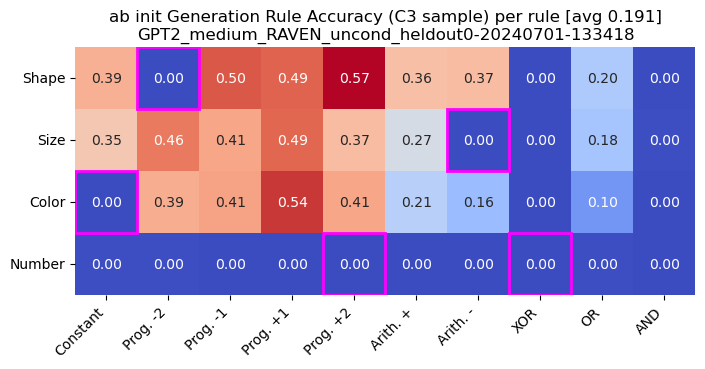

In [106]:
# plotinput = (accuracy_table[-5:,:].mean(axis=0))
plotmat = (cons3_rule_cnt_mat[-5:,:].mean(axis=0)).reshape(4, -1) / eval_sample_num * 40
plot_rule_heatmap_matrix(plotmat, heldout_id=heldout_id)
plt.title(f"ab init Generation Rule Accuracy (C3 sample) per rule [avg {plotmat.mean():.3f}]\n{expname}")
saveallforms(figsyndir, f"{expname}_abinit_gen_acc_heatmap_C3sample", )

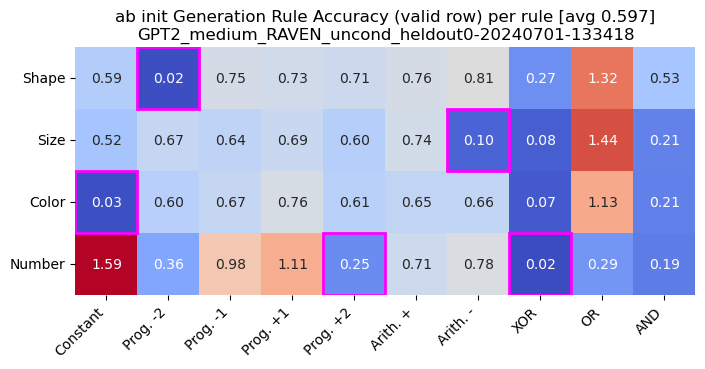

In [107]:
# plotinput = (accuracy_table[-5:,:].mean(axis=0))
plotmat = (rule_cnt_mat[-5:,:].mean(axis=0)).reshape(4, -1) / eval_sample_num / 3 * 40 
plot_rule_heatmap_matrix(plotmat, heldout_id=heldout_id)
plt.title(f"ab init Generation Rule Accuracy (valid row) per rule [avg {plotmat.mean():.3f}]\n{expname}")
saveallforms(figsyndir, f"{expname}_abinit_gen_acc_heatmap_validrow", )

In [10]:
expfullname = syndf_GPT.loc['GPT2_medium_uncond_heldout0'].full_name
print(expfullname)
expname = expfullname.split("/tensorboard_logs")[0]
prefix = "eval_step" if "stream" in expname else "eval_epoch"
eval_col = sweep_collect_eval_data(expname, GPT_exproot, prefix=prefix)
epoch_list, rule_list_all_cont, consistency_all_cont = extract_rule_list_from_eval_col(eval_col, is_abinit=False)
rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all_cont, consistency_all_cont)
eval_sample_num = rule_list_all_cont.shape[1]

if "heldout0" in expname:
    heldout_id = [1, 16, 20, 34, 37]  
else:
    heldout_id = []

GPT2_medium_RAVEN_uncond_heldout0-20240701-133418/tensorboard_logs
Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven/GPT2_medium_RAVEN_uncond_heldout0-20240701-133418/samples
example file: eval_epoch9.pt


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


(100, 2000, 3) (100, 2, 2000)


In [27]:
sum(len(rule3) > 0 for rule3 in rule_list[:,-1])

1475

In [28]:
epoch_num = rule_list_all_cont.shape[0]
rule_num = 40
acc_cnt_table = np.zeros((epoch_num, rule_num))
accuracy_table = np.zeros((epoch_num, rule_num))
val_cnt_table = np.zeros((epoch_num, rule_num))
val_accuracy_table = np.zeros((epoch_num, rule_num))
mis_cnt_table = np.zeros((epoch_num, rule_num, rule_num))
for epochi in range(epoch_num):
    rule_list = rule_list_all_cont[epochi]
    consistency_list = consistency_all_cont[epochi]
    for rulei in range(rule_num):
        rule_mask = (rule_list[:,0]==np.array([rulei])) & (rule_list[:,1]==np.array([rulei]))
        C3_rules = consistency_list[0][rule_mask]
        C3_rules_flatten = sum(list(C3_rules), [])
        C3_cont_cnt = len(C3_rules_flatten)
        accuracy_table[epochi, rulei] = C3_cont_cnt / sum(rule_mask)
        acc_cnt_table[epochi, rulei] = C3_cont_cnt
        val_cnt_table[epochi, rulei] = sum(len(rule3) > 0 for rule3 in rule_list[rule_mask,-1])
        val_accuracy_table[epochi, rulei] = val_cnt_table[epochi, rulei] / sum(rule_mask)

In [16]:
accuracy_table[-5:,:].mean(axis=0)

array([0.964, 0.   , 0.98 , 0.984, 0.972, 0.932, 0.876, 0.056, 0.572,
       0.076, 0.944, 0.912, 0.956, 0.956, 0.928, 0.82 , 0.02 , 0.   ,
       0.608, 0.096, 0.004, 0.96 , 0.996, 0.996, 0.988, 0.704, 0.724,
       0.02 , 0.464, 0.044, 0.724, 0.708, 0.564, 0.72 , 0.232, 0.824,
       0.76 , 0.02 , 0.984, 0.944])

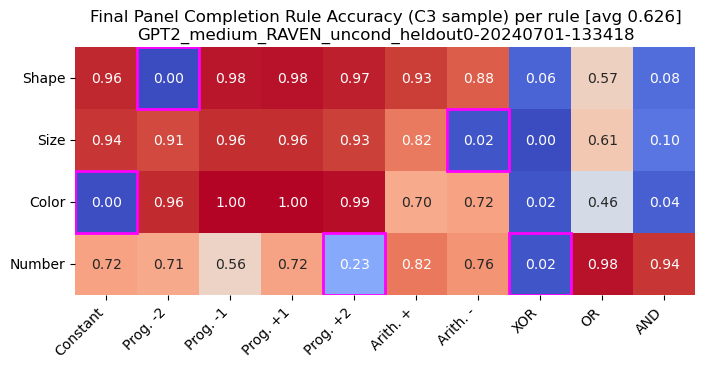

In [35]:
# plotinput = (accuracy_table[-5:,:].mean(axis=0))
plotmat = (accuracy_table[-5:,:].mean(axis=0)).reshape(4, -1)
plt.figure(figsize=(8, 6))
sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
add_rectangles(heldout_id, edgecolor="magenta", )
plt.axis("image")
plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
plt.title(f"Final Panel Completion Rule Accuracy (C3 sample) per rule [avg {plotmat.mean():.3f}]\n{expname}")
saveallforms(figsyndir, f"{expname}_final_panel_compl_acc_heatmap_C3sample", )

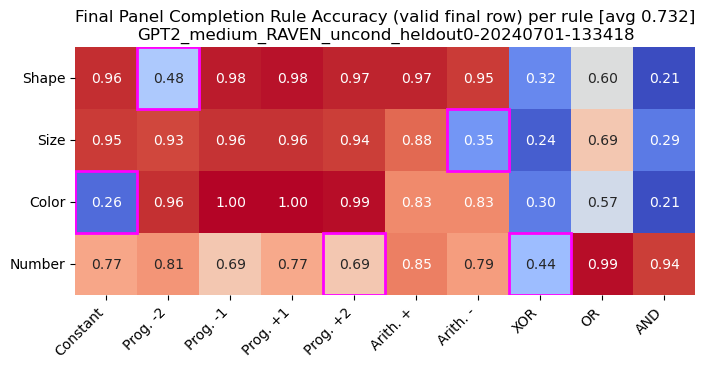

In [36]:
# plotinput = (accuracy_table[-5:,:].mean(axis=0))
plotmat = (val_accuracy_table[-5:,:].mean(axis=0)).reshape(4, -1)
plt.figure(figsize=(8, 6))
sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
add_rectangles(heldout_id, edgecolor="magenta", )
plt.axis("image")
plt.title(f"Final Panel Completion Rule Accuracy (valid final row) per rule [avg {plotmat.mean():.3f}]\n{expname}")
plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
saveallforms(figsyndir, f"{expname}_final_panel_compl_acc_heatmap_validrow", )

In [83]:
GPT_acc_vec = accuracy_table[-5:,:].mean(axis=0)
df_GPT_cplt = pd.DataFrame({"rule": range(40), "accuracy": GPT_acc_vec})

### EDM & DiT

In [74]:
expname = "WideBlnrX3_new_RAVEN10_abstract_20240412-1347"
exproot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps"
DATASET = "RAVEN10_abstract"
expdir = join(exproot, expname)
EDM_inpaint_dir = join(expdir, "inpaint_pilot")
df_EDM_cplt = pd.read_csv(join(EDM_inpaint_dir, "inpaint_rule_stats.csv"))

<Figure size 1000x400 with 0 Axes>

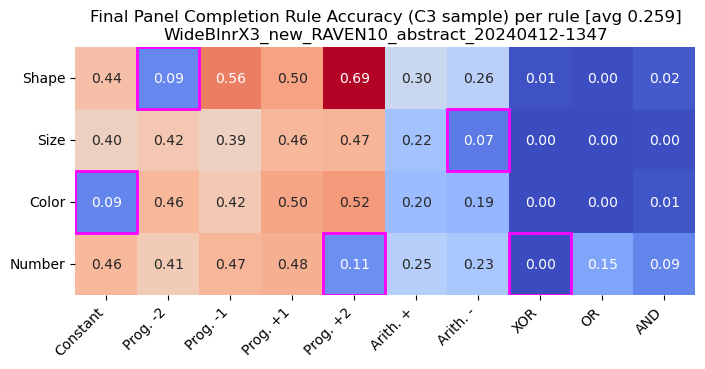

In [75]:
r3_per_class = df_EDM_cplt.groupby("iclass").agg({"consistent_r3": "mean"})
r3mat = r3_per_class.to_numpy().reshape(4,10) / 100
plt.figure(figsize=(10, 4))
figh = plot_rule_heatmap_matrix(r3mat, heldout_id=heldout_id)
plt.title(f"Final Panel Completion Rule Accuracy (C3 sample) per rule [avg {r3mat.mean():.3f}]\n{expname}")
saveallforms(figsyndir, f"{expname}_final_panel_compl_acc_heatmap_C3sample", )
# saveallforms(figdir, f"{expname}_inpaint_rule_consistency_per_class_heatmap", fmts=["png", "pdf"])

In [76]:
suffix = '_unif_baseline'
baseline_expname = "Uniform filling baseline"
df_rnd = pd.read_csv(join(EDM_inpaint_dir, f"inpaint_rule_stats{suffix}.csv"))

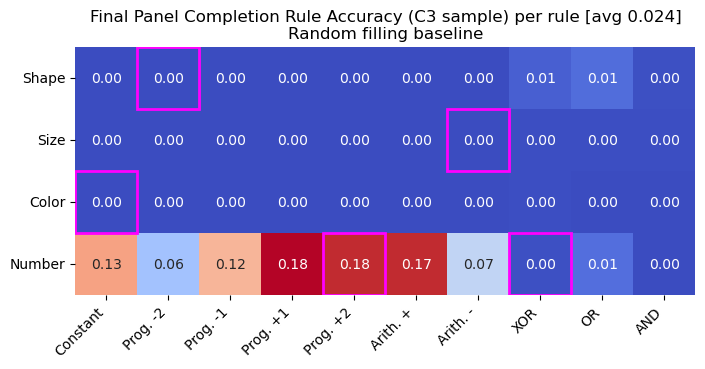

In [77]:
r3_per_class = df_rnd.groupby("iclass").agg({"consistent_r3": "mean"})
r3mat = r3_per_class.to_numpy().reshape(4,10) / 100
figh = plot_rule_heatmap_matrix(r3mat, heldout_id=heldout_id)
plt.title(f"Final Panel Completion Rule Accuracy (C3 sample) per rule [avg {r3mat.mean():.3f}]\n{'Random filling baseline'}")
saveallforms(figsyndir, f"{baseline_expname}_final_panel_compl_acc_heatmap_C3sample", )

In [78]:
DiTroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results"
DiTexpname = "045-RAVEN10_abstract-uncond-DiT_S_1_20240311-1256"
expdir = join(DiTroot, DiTexpname)
DiT_inpaint_dir = join(expdir, "inpaint_pilot")
df_DiT_cplt = pd.read_csv(join(DiT_inpaint_dir, "inpaint_rule_stats.csv"))

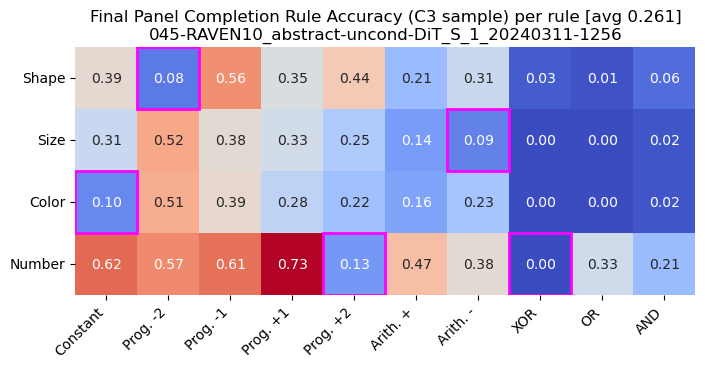

In [79]:
r3_per_class = df_DiT_cplt.groupby("iclass").agg({"consistent_r3": "mean"})
r3mat = r3_per_class.to_numpy().reshape(4,10) / 100
figh = plot_rule_heatmap_matrix(r3mat, heldout_id=heldout_id)
plt.title(f"Final Panel Completion Rule Accuracy (C3 sample) per rule [avg {r3mat.mean():.3f}]\n{DiTexpname}")
saveallforms(figsyndir, f"{DiTexpname}_final_panel_compl_acc_heatmap_C3sample", )

### Synopsis

In [89]:
r3_per_class_GPT = pd.DataFrame({"consistent_r3": GPT_acc_vec})
# rename the index as "iclass"
r3_per_class_GPT.index = r3_per_class.index

In [ ]:
r3_per_class_GPT

In [98]:
train_msk = np.ones(40, dtype=bool)
train_msk[heldout_id] = False
r3_per_class_DiT = df_DiT_cplt.groupby("iclass").agg({"consistent_r3": "mean"}) / 100
r3_per_class_EDM = df_EDM_cplt.groupby("iclass").agg({"consistent_r3": "mean"}) / 100
r3_per_class_rnd = df_rnd.groupby("iclass").agg({"consistent_r3": "mean"}) / 100 # 40 classes array 
r3_per_class_DiT["Train"] = train_msk
r3_per_class_DiT["model"] = "DiT"
r3_per_class_EDM["Train"] = train_msk
r3_per_class_EDM["model"] = "EDM"
r3_per_class_rnd["Train"] = train_msk
r3_per_class_rnd["model"] = "Random"
r3_per_class_GPT["Train"] = train_msk
r3_per_class_GPT["model"] = "GPT2"
r3_per_class_cmb = pd.concat([r3_per_class_GPT, r3_per_class_DiT, r3_per_class_EDM, r3_per_class_rnd], axis=0)

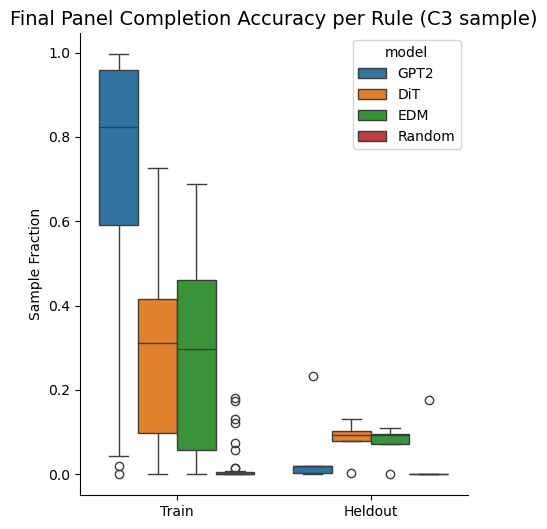

In [100]:
figh = plt.figure(figsize=(5, 6))
sns.boxplot(data=r3_per_class_cmb, x="Train", y="consistent_r3", hue="model", linewidth=1, order=[True, False],) # color="white", 
plt.title(f"Final Panel Completion Accuracy per Rule (C3 sample)", fontsize=14)
plt.ylabel("Sample Fraction")
plt.xticks([0, 1], ["Train", "Heldout", ])
plt.xlabel("")
saveallforms(figsyndir, "AllModel_panel_completion_C3sample_acc_synopsis", figh, ["png", "pdf"])
plt.show()